In [214]:
# load data from trainData.csv

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# load data from trainData.csv
df = pd.read_csv('trainData.csv')

In [215]:
# Data analysis
print(df.head())
print("Count: " , df.count()[0])
print("Describe: \n" ,df.describe())

   Unnamed: 0 policy_id  policy_tenure  age_of_car  age_of_policyholder  \
0       46162   ID46163       0.221382        0.01             0.576923   
1       30486   ID30487       1.146590        0.09             0.509615   
2       46451   ID46452       0.089446        0.06             0.288462   
3       32085   ID32086       1.077184        0.29             0.759615   
4       27915   ID27916       0.086029        0.05             0.326923   

  area_cluster  population_density  make segment model  ... is_brake_assist  \
0           C1              4990.0   1.0       A    M1  ...              No   
1           C8              8794.0   3.0      C2    M4  ...             Yes   
2           C5             34738.0   5.0      C1    M9  ...              No   
3          C10             73430.0   1.0      B1    M8  ...              No   
4           C1              4990.0   1.0      B1    M8  ...              No   

  is_power_door_locks is_central_locking is_power_steering  \
0           

In [216]:
# Pre-processing the data, including handles null value and feature
# selection, 

# clean up the data
# if the following columns have null value, replace it with No
# is_front_fog_lights                 
# is_rear_window_wiper                
# is_rear_window_washer               
# is_rear_window_defogger             
# is_brake_assist                     
# is_power_door_locks                 
# is_central_locking                  
# is_power_steering                   
# is_driver_seat_height_adjustable    
# is_day_night_rear_view_mirror       
# is_ecw                              
# is_speed_alert                                               
# is_esc                              
# is_adjustable_steering              
# is_tpms                             
# is_parking_sensors                  
# is_parking_camera

df = df.fillna({
        'is_front_fog_lights': 'No', 
        'is_rear_window_wiper': 'No', 
        'is_rear_window_washer': 'No', 
        'is_rear_window_defogger': 'No', 
        'is_brake_assist': 'No', 
        'is_power_door_locks': 'No', 
        'is_central_locking': 'No', 
        'is_power_steering': 'No', 
        'is_driver_seat_height_adjustable': 'No', 
        'is_day_night_rear_view_mirror': 'No', 
        'is_ecw': 'No', 
        'is_speed_alert': 'No',  
        'is_esc': 'No', 
        'is_adjustable_steering': 'No', 
        'is_tpms': 'No', 
        'is_parking_sensors': 'No', 
        'is_parking_camera': 'No',
        })

# if the following columns have null value, replace it with 0
# airbags
# is_claim
# ncap_rating

df = df.fillna({'airbags': 0, 'is_claim': 0, 'ncap_rating': 0})

# if the following columns have null value, replace it with 1
# gear_box 
# 

df = df.fillna({'gear_box': 1})

# if the following columns have null value, replace it with Automatic
# transmission_type

df = df.fillna({'transmission_type': 'Automatic'})

# all other records with null value, drop them

df = df.dropna()

df.count()


Unnamed: 0                          26210
policy_id                           26210
policy_tenure                       26210
age_of_car                          26210
age_of_policyholder                 26210
area_cluster                        26210
population_density                  26210
make                                26210
segment                             26210
model                               26210
fuel_type                           26210
max_torque                          26210
max_power                           26210
engine_type                         26210
airbags                             26210
is_esc                              26210
is_adjustable_steering              26210
is_tpms                             26210
is_parking_sensors                  26210
is_parking_camera                   26210
rear_brakes_type                    26210
displacement                        26210
cylinder                            26210
transmission_type                 

In [217]:
# check the correlation of data
df.corr()

/var/folders/ds/t8xryp7s01g62t9rlkhp9t580000gn/T/ipykernel_32615/3547429763.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
Unnamed: 0,1.000000,0.000595,0.005438,-0.000176,-0.008365,0.004572,0.011653,0.008512,0.006935,0.010805,0.009514,0.010454,0.010388,0.005542,0.010841,0.005417,-0.003547
policy_tenure,0.000595,1.000000,0.168033,0.140681,-0.105983,0.084677,0.099288,0.195557,0.192431,0.091887,0.167353,0.191283,0.213962,0.120658,0.138807,0.175722,0.079668
age_of_car,0.005438,0.168033,1.000000,-0.040344,-0.074217,0.194652,0.210801,0.398554,0.382609,0.203935,0.335596,0.386930,0.417239,0.263566,0.303528,0.352623,-0.028316
age_of_policyholder,-0.000176,0.140681,-0.040344,1.000000,0.006890,-0.032370,-0.004513,-0.025044,0.002833,0.000240,-0.015539,-0.019566,-0.007209,-0.055271,-0.004676,-0.034421,0.016277
population_density,-0.008365,-0.105983,-0.074217,0.006890,1.000000,-0.037130,-0.067827,-0.100345,-0.104300,-0.062288,-0.085645,-0.102117,-0.109056,-0.067018,-0.085558,-0.075264,-0.020471
make,0.004572,0.084677,0.194652,-0.032370,-0.037130,1.000000,0.489959,0.751933,0.407320,0.621588,0.750176,0.688365,0.507846,0.301126,0.472597,0.793165,-0.003454
airbags,0.011653,0.099288,0.210801,-0.004513,-0.067827,0.489959,1.000000,0.656648,0.477980,0.850227,0.805087,0.806292,0.635596,0.427961,0.826707,0.329699,-0.000842
displacement,0.008512,0.195557,0.398554,-0.025044,-0.100345,0.751933,0.656648,1.000000,0.865234,0.683548,0.874318,0.961090,0.899884,0.553269,0.771314,0.845187,0.005071
cylinder,0.006935,0.192431,0.382609,0.002833,-0.104300,0.407320,0.477980,0.865234,1.000000,0.402975,0.613314,0.804606,0.863945,0.347165,0.598709,0.593581,0.011126
gear_box,0.010805,0.091887,0.203935,0.000240,-0.062288,0.621588,0.850227,0.683548,0.402975,1.000000,0.854031,0.801641,0.595542,0.581443,0.888265,0.520476,-0.001506


/Users/deep/College/Machine Learning/final_project/env/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


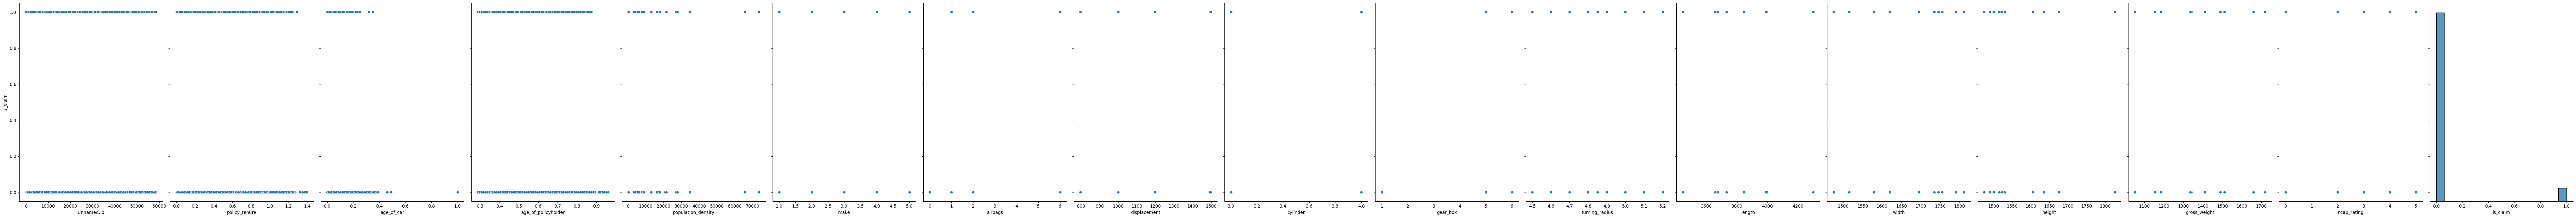

/Users/deep/College/Machine Learning/final_project/env/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


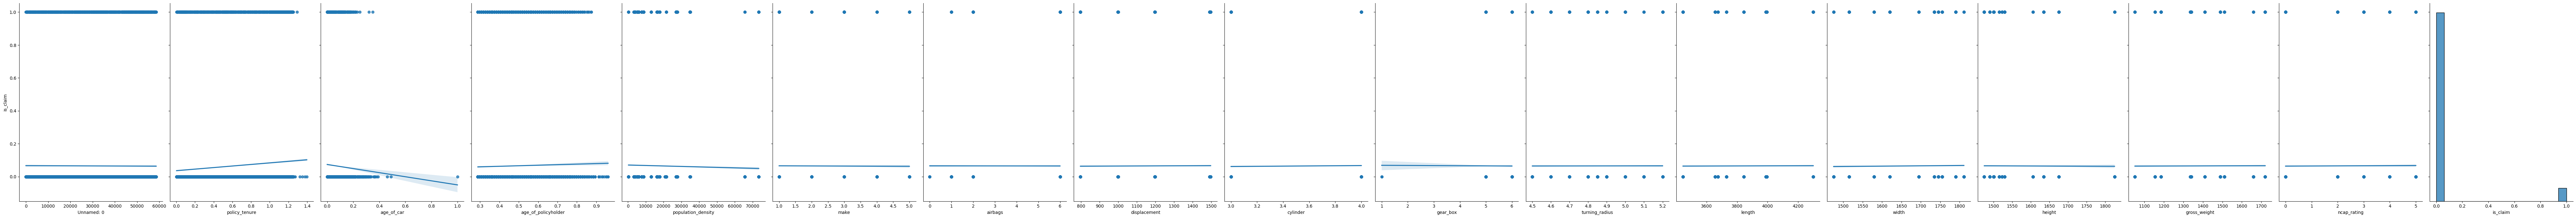

In [218]:
# Use two plotting to show the visualization property of the data. 
# The first one is the scatter plot of the data.
# The second one is regression plot of the data.

import matplotlib.pyplot as plt
import seaborn as sns

# scatter plot
sns.pairplot(df, y_vars='is_claim', size=7, aspect=0.7)
plt.show()

# regression plot
sns.pairplot(df, y_vars='is_claim', size=7, aspect=0.7, kind='reg')
plt.show()


In [219]:
from sklearn.preprocessing import LabelEncoder

from collections import defaultdict
dict = defaultdict(LabelEncoder)

# Encoding the variable
df_fit = df.apply(lambda x: dict[x.name].fit_transform(x))

# test data is in testDatawithoutTarget.csv
# load data from testDatawithoutTarget.csv
df_test = pd.read_csv('testDatawithoutTarget.csv')
# encode the test data
df_test_fit = df_test.apply(lambda x: dict[x.name].fit_transform(x))


In [220]:
# splitting the data into training and testing data
# but since the train data is in trainData.csv, we don't need to split the data
# 
from sklearn.model_selection import train_test_split

X = df_fit.drop('is_claim', axis=1)
y = df_fit['is_claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [221]:
# using the confusion matrix
#  and classification report to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report
# using knn to predict the data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# predict the data
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))

print(classification_report(y_test, knn_pred))




[[4588  306]
 [ 323   25]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4894
           1       0.08      0.07      0.07       348

    accuracy                           0.88      5242
   macro avg       0.50      0.50      0.50      5242
weighted avg       0.88      0.88      0.88      5242



In [222]:
# using the random forest to predict the data
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# predict the data
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfc_pred))

print(classification_report(y_test, rfc_pred))

[[4893    1]
 [ 348    0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4894
           1       0.00      0.00      0.00       348

    accuracy                           0.93      5242
   macro avg       0.47      0.50      0.48      5242
weighted avg       0.87      0.93      0.90      5242



In [223]:
# using the decision tree to predict the data
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

# predict the data

dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtree_pred))

print(classification_report(y_test, dtree_pred))


[[4520  374]
 [ 320   28]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4894
           1       0.07      0.08      0.07       348

    accuracy                           0.87      5242
   macro avg       0.50      0.50      0.50      5242
weighted avg       0.88      0.87      0.87      5242



In [224]:
# Based on the result of the confusion matrix and classification report,
# we can see that the random forest has the best result, so we use the random forest
# to predict the test data, hence we can use that to predict the target value of the
# test data.

# predict the test data
rfc_pred_test = rfc.predict(df_test_fit)

# save the result to a csv file
df_test['is_claim'] = rfc_pred_test
df_test.to_csv('testDatawithTarget.csv', index=False)
